# Visualization and Communication

## Zhentao Shi

<img src="graph/Minard.png" width="1000">
<!-- code is tested on SCRP -->

## Graphs

* "One picture is worth ten thousand words".
* Modern graphs: web-based, interactive.

* Academia
* Journalism: Economist, SCMP, ...

## Plot()

* `plot` is a generic command for graphs in `r-base`.
  * For preliminary statistical graphs.

* `matplot` for multiple objects

In [ ]:
quantmod::getFX("USD/JPY")
quantmod::getFX("HKD/JPY")
matplot( y = cbind(USDJPY, HKDJPY*7.8), 
         x = zoo::index(USDJPY), 
         type = "l", xlab = "time"  )

## ggplot2


* Many proposals to enhance `plot`
* `ggplot2` is the most successful. 

* Advanced system for high-quality statistical graphs.
* Many details  
  * Reference: [**ggplot2 book**](http://link.springer.com/book/10.1007%2F978-0-387-98141-3),
  * Downloadable inside CUHK campus network (VPN needed).


## Syntax

* `ggplot()` specifies which dataset to use for the graph.
* `geom_XXX()` determines the shape to draw,  
  *  scatter dots
  *  lines
  *  curves or areas...

── Attaching core tidyverse packages ───────────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ─────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


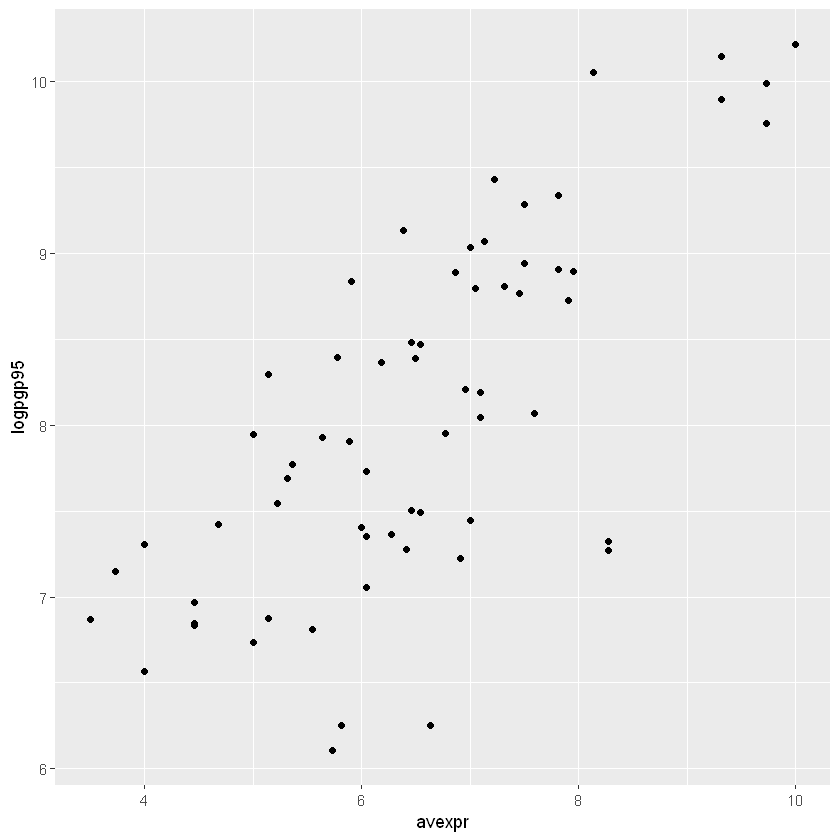

In [3]:
library(tidyverse)
d0 = read.csv("data_example/AJR.csv", header = TRUE)

# "avexpr: average protection against expropriation risk
# "logpgp95": logarithm of GDP per capita in 1995

ggplot(data = d0) + geom_point(mapping = aes(x = avexpr, y = logpgp95))


### Bank Marketing Data


In [4]:
bank_0 = read.csv("data_example/bank-full.csv", header = TRUE, sep = ";" )
dim(bank_0)

[1] 45211    17

In [ ]:
# scatter plot
p1 <- ggplot(data = bank_0) + geom_point(mapping = aes(x = age, y = balance)) 
# balance: average yearly balance, in euros (numeric) 
print(p1)

In [ ]:
# scatter plot with groups
p2 <- ggplot(data = bank_0) + geom_point(mapping = aes(x = age, y = balance, 
                                                       color = education, 
                                                       alpha = 0.5))
print(p2)

### Subgraphs

* Subgraphs convey rich information and easy comparison.
* `ggplot2` is good at drawing multiple graphs, either of the same pattern or of
different patterns. 


In [5]:
p3 <- p1 + facet_wrap( martial ~ education)
print(p3)

ERROR: Error in eval(expr, envir, enclos): object 'p1' not found


In [ ]:
# educational levels in each ago
ggplot(data = bank_0) + geom_bar(mapping = aes(x = age, fill = education))

In [ ]:
p4 <- ggplot(data = bank_0) + geom_bar(mapping = aes(x = age, fill = education), position = "dodge")
print(p4)

In [ ]:
p5 <- p4 + coord_flip()
print(p5)

## Tidy data

* ggplot adds elements in a graph one by one, and then print out the graph all together.

* `ggplot2` accommodates data frames of a particular format. 
* `tidyr` is a package that helps prepare the data frames.


* Example: [Penn World Table](https://www.rug.nl/ggdc/productivity/pwt/?lang=en)

In [6]:
d0 = readr::read_csv("data_example/PWT100.csv", col_names = TRUE)
head(d0)
colnames(d0)

Rows: 12810 Columns: 52
── Column specification ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr  (8): countrycode, country, currency_unit, i_cig, i_xm, i_xr, i_outlier,...
dbl (44): year, rgdpe, rgdpo, pop, emp, avh, hc, ccon, cda, cgdpe, cgdpo, cn...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


countrycode,country,currency_unit,year,rgdpe,rgdpo,pop,emp,avh,hc,⋯,csh_x,csh_m,csh_r,pl_c,pl_i,pl_g,pl_x,pl_m,pl_n,pl_k
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ABW,Aruba,Aruban Guilder,1950,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
ABW,Aruba,Aruban Guilder,1951,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
ABW,Aruba,Aruban Guilder,1952,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
ABW,Aruba,Aruban Guilder,1953,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
ABW,Aruba,Aruban Guilder,1954,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
ABW,Aruba,Aruban Guilder,1955,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


[1] "countrycode"   "country"       "currency_unit" "year"         
 [5] "rgdpe"         "rgdpo"         "pop"           "emp"          
 [9] "avh"           "hc"            "ccon"          "cda"          
[13] "cgdpe"         "cgdpo"         "cn"            "ck"           
[17] "ctfp"          "cwtfp"         "rgdpna"        "rconna"       
[21] "rdana"         "rnna"          "rkna"          "rtfpna"       
[25] "rwtfpna"       "labsh"         "irr"           "delta"        
[29] "xr"            "pl_con"        "pl_da"         "pl_gdpo"      
[33] "i_cig"         "i_xm"          "i_xr"          "i_outlier"    
[37] "i_irr"         "cor_exp"       "statcap"       "csh_c"        
[41] "csh_i"         "csh_g"         "csh_x"         "csh_m"        
[45] "csh_r"         "pl_c"          "pl_i"          "pl_g"         
[49] "pl_x"          "pl_m"          "pl_n"          "pl_k"

In [7]:
# work with a smaller dataset

d1 <- select(d0, countrycode, year, rgdpe, pop) %>%
  filter(countrycode %in% c("CHN", "RUS", "JPN", "USA")) %>%
  mutate(gdpcapita = rgdpe/pop) 

# rgdpe: Expenditure-side real GDP at chained PPPs, 
#        to compare relative living standards across countries and over time

print(d1)  

# A tibble: 280 × 5
   countrycode  year   rgdpe   pop gdpcapita
   <chr>       <dbl>   <dbl> <dbl>     <dbl>
 1 CHN          1950     NA    NA        NA 
 2 CHN          1951     NA    NA        NA 
 3 CHN          1952 554906.  580.      957.
 4 CHN          1953 626291.  589.     1063.
 5 CHN          1954 584967.  600.      975.
 6 CHN          1955 642037   612.     1049.
 7 CHN          1956 693936.  625.     1111.
 8 CHN          1957 718619.  639.     1125.
 9 CHN          1958 732356.  652.     1123.
10 CHN          1959 698911.  660.     1059.
# ℹ 270 more rows


Warning message:
"Removed 42 rows containing missing values (`geom_point()`)."


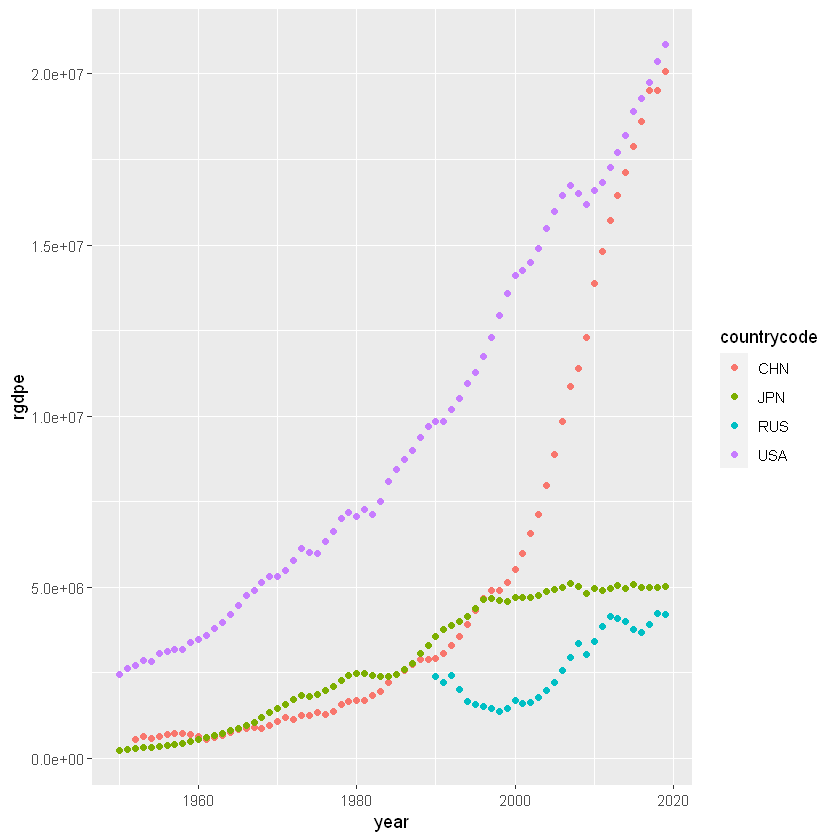

In [8]:
ggplot(d1) + 
  geom_point(mapping = aes(x = year, y = rgdpe, color = countrycode))

In [ ]:
ggplot(d1) + 
  geom_line(mapping = aes(x = year, y = gdpcapita, color = countrycode))

In [ ]:
s1 <- d1 %>% 
  select( countrycode, year, pop) %>%
  spread( key = year, value = pop)
print(s1)


In [ ]:
gather(s1, '1950':'2019', key = "year", value = "pop")

### Subgraphs of the same pattern


* Example: Plot the density of two estimators under three different data generating processes.



In [ ]:
load("data_example/big150.Rdata")
head(big150)

In [ ]:

big150_1 <- select(big150, typb, b1, b1_c) %>%
            gather("b1", "b1_c", key = "estimator", value = "value")
print(head(big150_1))


`theme` is to tune the supplementary elements like the background, the size and font of the axis text and so on.

In [ ]:

p1 <- ggplot(big150_1)
p1 <- p1 + geom_area(
  stat = "density", alpha = .25,
  aes(x = value, fill = estimator), position = "identity"
)
p1 <- p1 + facet_grid(. ~ typb)
p1 <- p1 + geom_vline(xintercept = 0)
p1 <- p1 + theme_bw()
p1 <- p1 + theme(
  strip.text = element_text(size = 12),
  axis.text = element_text(size = 12)
)
print(p1)

### Example

* This example aligns two graphs of different patterns in one page.
  * Similar graphs appear in [Shi and Zheng, 2018](https://onlinelibrary.wiley.com/doi/abs/10.1002/jae.2640).
  * To unify the theme of the two subgraphs,
define an object `theme1` and apply it in both graphic objects
`p1` and `p2`.



In [ ]:
# graph packages
library(lattice)
library(ggplot2)
library(gridExtra)

load("data_example/multigraph.Rdata") # load data

# unify the theme in the two graphs
theme1 <- theme_bw() + theme(
  axis.title.x = element_blank(),
  strip.text = element_text(size = 12),
  axis.text = element_text(size = 12),
  legend.position = "bottom", legend.title = element_blank()
)

In [ ]:
# sub-graph 1
d1 <- data.frame(month = 1:480, m = m_vec)
p1 <- qplot(x = month, y = m, data = d1, geom = "line")
p1 <- p1 + theme1 + ylab("fraction of chartists")

# sug-graph 2
d2$month <- 1:480
p2 <- ggplot(d2) + geom_line(aes(x = month, y = value, col = variable))
p2 <- p2 + theme1 + ylab("price and fundamental")

# generate the grahp
grid.arrange(p1, p2, nrow = 2)

## Interactive Graph

* Users provides customized inputs
* Graph presents corresponding outcome

* `flexboard.Rmd` is an example.
* Easy to convert a ggplot2 graph with `plotly::ggplotly()`.



## R Markdown

* Provide R-basics from previous version of rmd file.

Notebooks

* Rmd format
* Ipynb format

## Shiny App

Web-based R package for interactive graph. 


* [tutorial](https://shiny.rstudio.com/tutorial/)


* `UI`: interface
* `Server`: calculation of input data


### Example


* [Shenzhen housing price](https://zhentao-shi.shinyapps.io/ShenzhenHousing-Shiny/)
  * [code](https://github.com/metricshilab/Shenzhen-Housing)
* [HP filter](https://zwmei-metrics.shinyapps.io/boosted_hp_app/)
  * [code](https://github.com/metricshilab/Boosted_HP_App)

**Also, see my script of Newton's method.**

## Reading

* Wickham and Grolemund](https://r4ds.had.co.nz/)
  * Ch 3: data visualization
  * Ch.12: tidy data
  * Ch 27: R markdown
  * Ch 28: graphics for communication
  * Ch 29: R markdown formats
  * Ch 30: R markdown workflow
  
* This [link](https://cosx.org/2023/02/earthquake/) is a good example of using `ggplot2` to draw nice statistical graphs.